In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import itertools

In [7]:
#define commonly used stuff
cur_dir = "C:/Users/Sriram/Desktop/data/"

subfolders = [f.path for f in os.scandir(cur_dir) if f.is_dir()] #in case we weant a pass through everyhting

log = "log_"
threads = "threads.csv"
iterate = "-iterate.txt"

#ALL THE POSSIBLE OPTIONS
samp_coord = ["1k-1k-", "1k-10k-", "10k-1k-"]
sparsities = ["0005-r", "0010-r", "0200-r", "1000-r"]

hw = "hogwild_linearregression_"
es = "exampleshared_linearregression_"
ei = "exampleindependent_linearregression_"
sh = "segmentedhogwild_linearregression_"
algos = [hw, es, ei, sh]

#define important quantities
num_threads = 36
num_samps = 100

#Define markers for plots
markers = itertools.cycle((',', '+', '.', 'o', '*', '^', 'x')) 

In [8]:
#DEFINE THE CURRENT PARAMETERS#
ALG = algos[0]
SAMPS = samp_coord[0]
SPARSITY = sparsities[0]

folder = ALG + SAMPS + SPARSITY
true_iter_file = SAMPS + SPARSITY + iterate

In [9]:
#give the filename of a log_#iterates.csv file to read and return as a 2d numpy array
def get_iteration_data(fname):
    df = pd.read_csv(fname)
    times = df.iloc[:,0].astype(float).values

    df.iloc[:, 1] = df.iloc[:, 1].astype(str).str.strip().str.lstrip('[').astype(float)
    df.iloc[:, -1] = df.iloc[:, -1].astype(str).str.strip().str.rstrip(']').astype(float)
    iterations = df.iloc[:, 1:].values
    
    return iterations, times

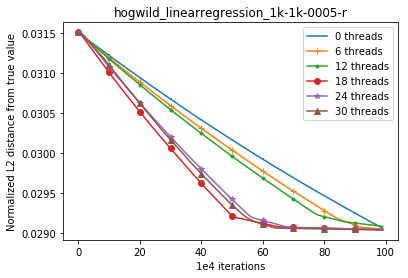

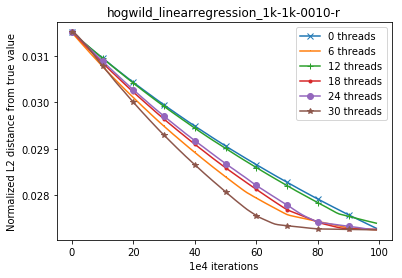

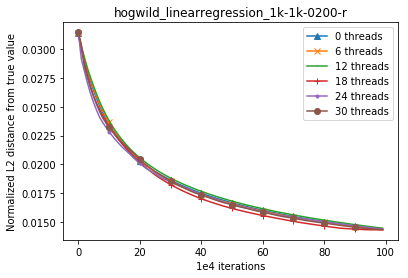

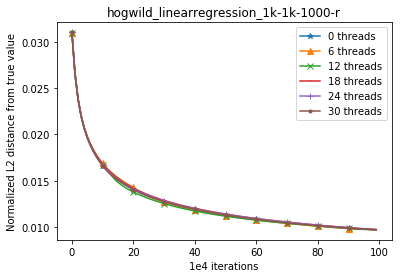

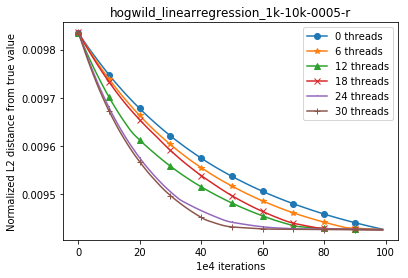

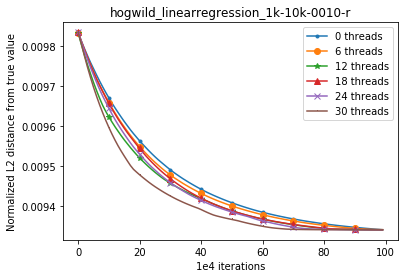

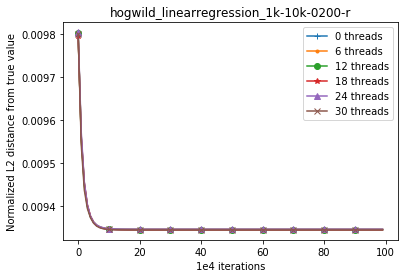

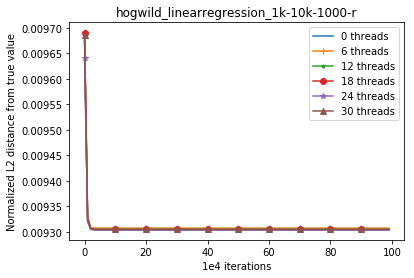

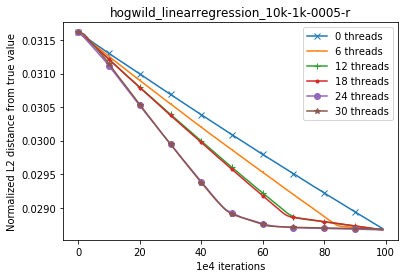

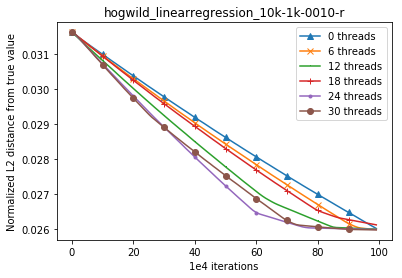

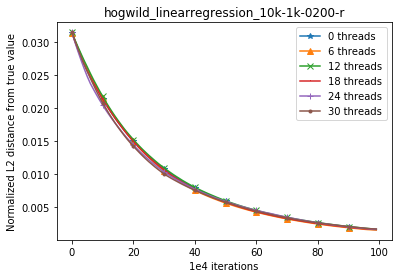

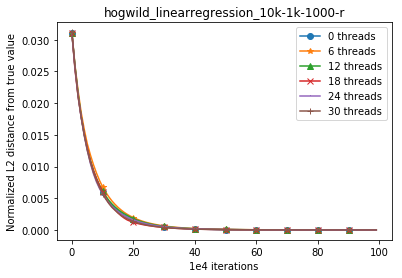

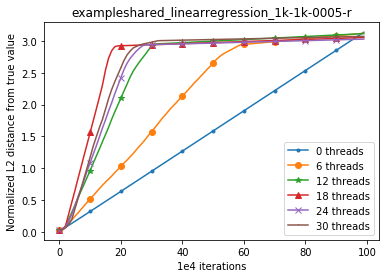

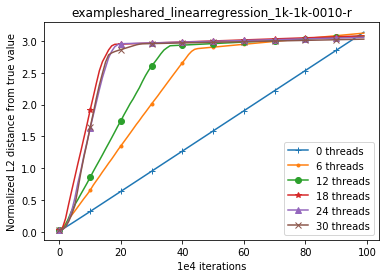

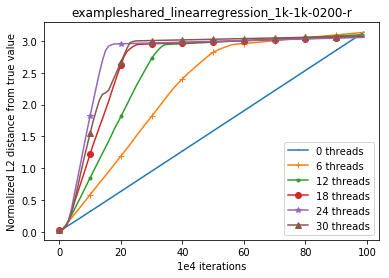

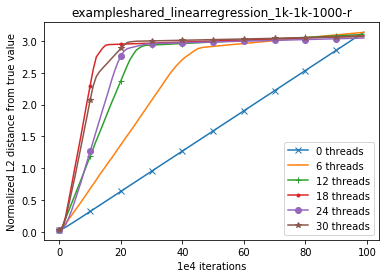

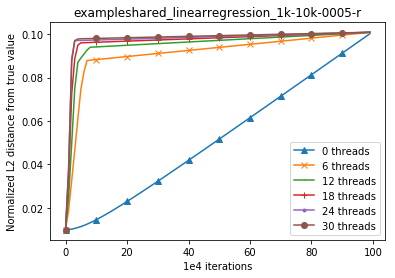

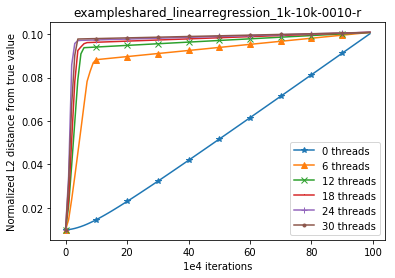

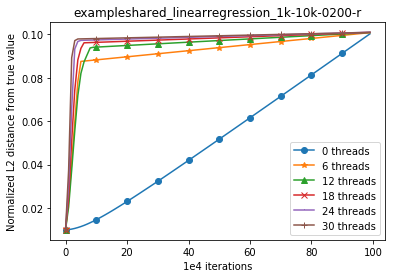

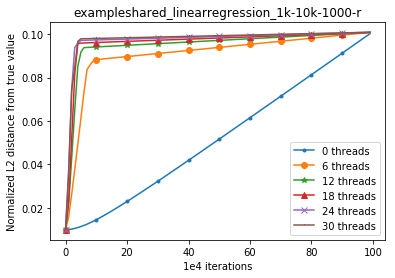

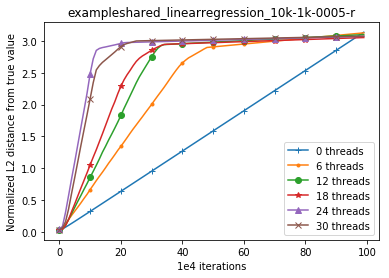

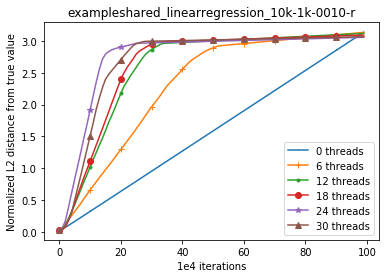

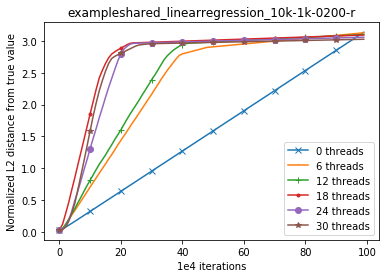

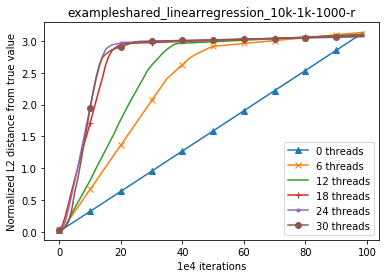

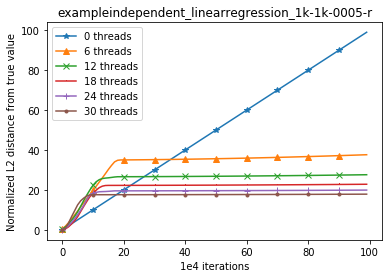

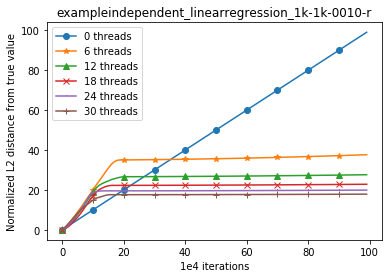

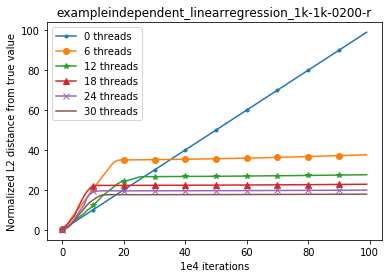

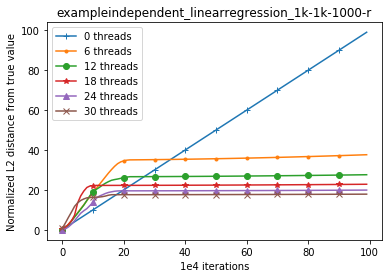

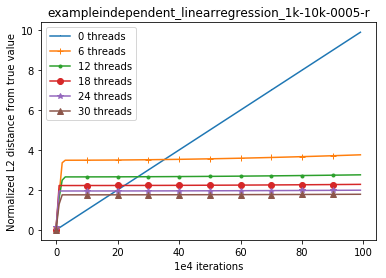

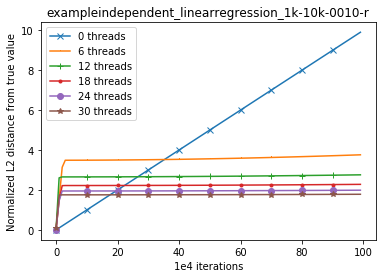

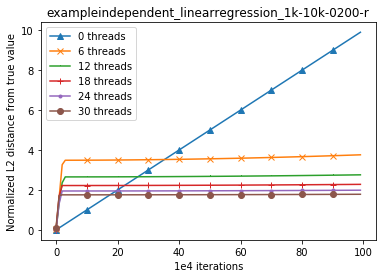

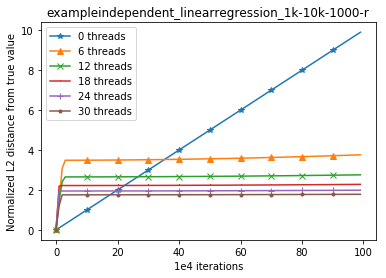

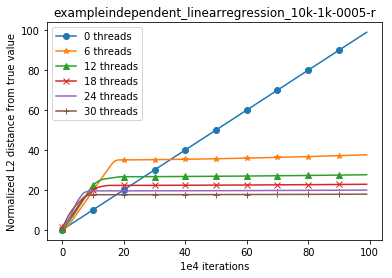

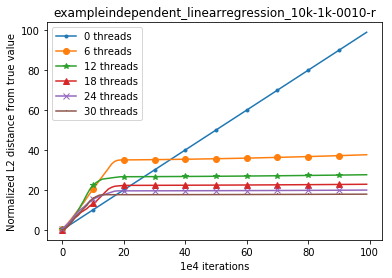

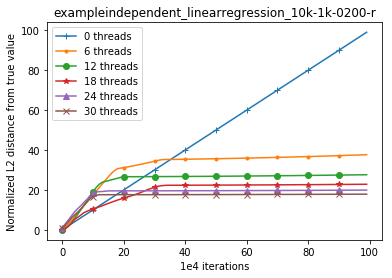

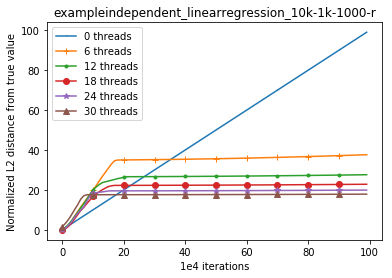

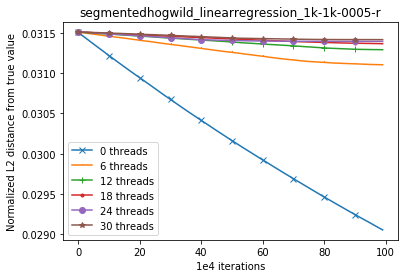

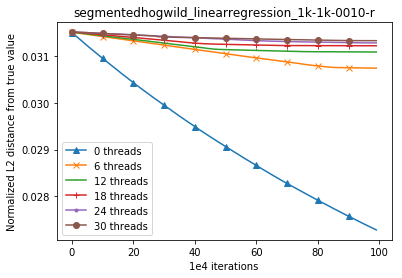

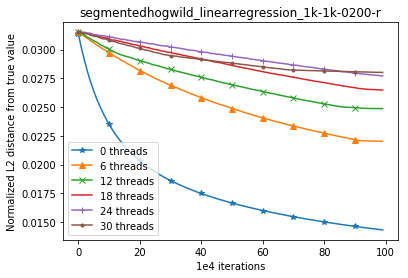

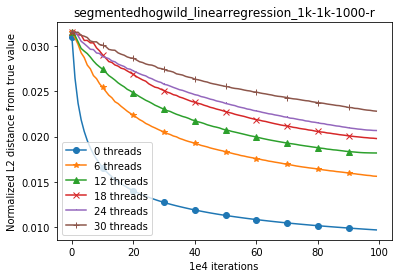

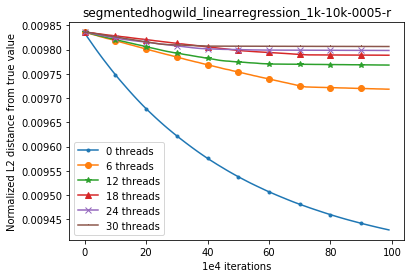

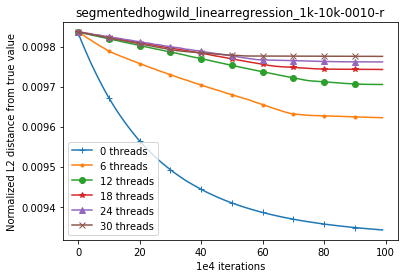

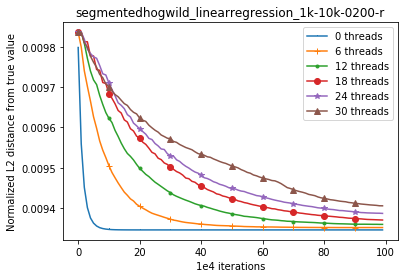

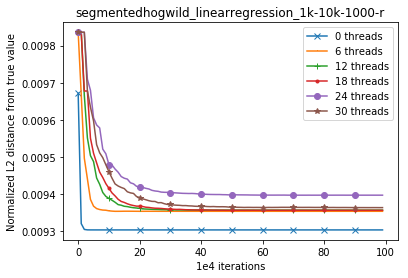

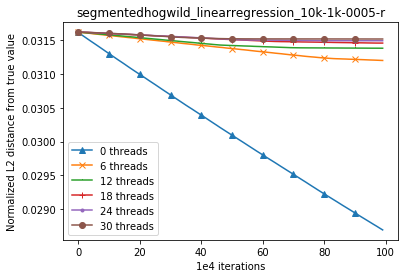

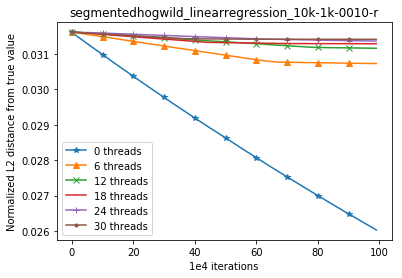

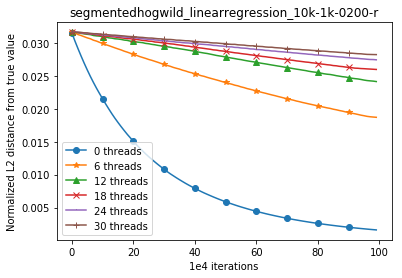

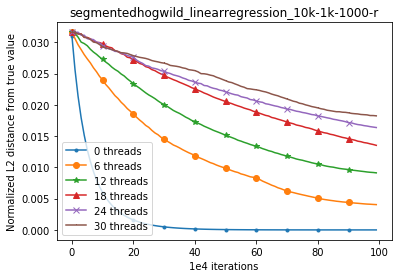

In [10]:
for a in algos:
    for sa in samp_coord:
        for sp in sparsities:
            
            ALG = a
            SAMPS = sa
            SPARSITY = sp
            
            folder = ALG + SAMPS + SPARSITY
            true_iter_file = SAMPS + SPARSITY + iterate
            
            plt.figure()

            true_iter = np.loadtxt(fname = cur_dir + true_iter_file, skiprows = 1)

            for t in range(0, num_threads, 6):
                loss = np.zeros(num_samps)
                iterations, times = get_iteration_data(cur_dir + folder + "/" + log + str(t+1) + threads)
                num_coords = iterations.shape[1]

                for s in range(0, num_samps):
                    loss[s] = np.linalg.norm(true_iter - iterations[s, :])/num_coords

                plt.plot(range(num_samps), loss, label = str(t) + " threads", marker=next(markers), markevery = 10)

            plt.legend()
            plt.xlabel("1e4 iterations")
            plt.ylabel("Normalized L2 distance from true value")
            plt.title(folder)
            plt.show()